
<!-- В VSCode есть специальное расширение для генерации интерактивного оглавления -->
<!-- Желательно в оглавлении сохранить нумерацию пунктов -->
<!-- Правилом хорошего тона является создание интерактивных заголовков пунктов и подпунктов, которые ведут на оглавление -->
**Тема:** Разработка Data Science проекта полного цикла

---

## Оглавление
1. [Предварительная обработка данных](#data-prep)
    * [1.1 Чтение и загрузка данных](#read-load)
    * [1.2 Первичный анализ данных](#data-analys)
    * [1.3 Разделение выборки на обучающую и тестовую выборки](#train-test)
    * [1.4 Обработка вещественных признаков](#data-fill)
    * [1.5 Кодирование категориальных признаков](#data-coder)
    * [1.6 Детекция выбросов и аномалий в данных](#data-anomaly)
    * [1.7 Подведение итогов раздела 1](#data-summary)
2. [Генерация новых признаков](#data-generate)
    * [2.1 Корреляционный анализ входных признаков](#data-heatmap)
    * [2.2 Исправление проблемы мультиколлинеарности в данных](#data-multp)
    * [2.3 Скалирование данных](#data-scaling)
    * [2.4 Подведение итогов раздела 2](#data-summary-2)
3. [Выбор моделей ML и метрик](#data-model)
4. [Обучение моделей ML и подбор гиперпараметров](#data-learning)
5. [Вычисление метрик на новых данных](#data-metrics)
6. [Результат работы](#data-summary-all)

<!-- В этой ячейке необходимо указать, какую задачу вы решаете, в развернутом виде -->
В данной работе решается задача регрессии, где целевым признаком является вещественный признак "Гармония Бессмертия".


<!--
    В этой и последующих ячейках предлагается описать исходные данные, а также сопутствующую информацию:
    1. таблицу с семантикой данных, а также типами данных столбцов (ожидаемый тип, а не фактический, которые мы получаем при чтении данных) в формате MD (кодом не надо выводить таблички)
    2. формулы прикладной области (с указанием, какие формулы можно использовать, а какие -- нет)
-->
| **№** | **Признак** | **Описание** | **Тип данных признака** |
|---|---|---|---|
| **1** | Вектор Мощи | Позиция магического механизма, управляющего интенсивностью перехода через портал. | Вещественный |
| **2** | Скорость перехода через портал | Скорость, с которой портал перемещает объект через пространство. | Вещественный |
| **3** | Приток Силы Потока | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу. | Вещественный |
| **4** | Ритм магического ядра | Число оборотов магического ядра портала в минуту. | Вещественный |
| **5** | Поток Энергий | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую. | Вещественный |
| **6** | Сила Левого Потока | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс. | Вещественный |
| **7** | Сила Правого Потока | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии. | Вещественный |
| **8** | Пламя Стихий | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия. | Вещественный |
| **9** | Температура вдоха Истока | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия. | Целочисленный |
| **10** | Температура выдоха Истока | Температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия. | Вещественный |
| **11** | Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления. | Вещественный |
| **12** | Давление вдоха Истока | Давление воздуха, входящего в магический ускоритель. | Вещественный |
| **13** | Давление выдоха Истока | Давление воздуха, исходящего из магического ускорителя. | Вещественный |
| **14** | Древний Ветер | Давление древней магической энергии, покидающей портал в виде выхлопного потока. | Вещественный |
| **15** | Печать Чародея | Параметр управления магическим впрыском в сердце портала, выраженный в процентах. | Вещественный |
| **16** | Эмульсия Истока | Количество магического топлива, подпитывающего портал. | Вещественный |
| **17** | Дыхание Истока | Коэффициент, отражающий степень угасания магического ускорителя. | Вещественный |
| **18** | Гармония Бессмертия | Коэффициент, указывающий на состояние магического ядра портала и его стабильность, требующий магического восстановления в случае снижения. | Вещественный |
| **19** | Тип Вектора Мощи | Метка типа позиции магического механизма | Категориальный |
| **21** | Номер пометки | Уникальный номер записи о работе портала в блокноте | Целочисленный |

# Общая мощность потока = Сила_Левого_Потока + Сила_Правого_Потока

# Представление о совокупности мощностей = Сила_Левого_Потока + Сила_Правого_Потока + Приток_Силы_Потока

# Общая сила ядра = Ритм_магического_ядра + Приток_Силы_Потока

# Общее давление на выходе = Приток_давления_Выдоха_Истока + Давление_выдоха_Истока

# Магическая производительность = Скорость_перезода_через_портал / Эмульсия_Истока

# Эффективность ядра = Общая_сила_ядра / Эмульсия_Истока

# Для расчёта магической мощности потребуется учесть "Эмульсию Истока", общее давление и разницу между "Пламенем Стихий" и "Температурой вдоха Истока

# Степень износа магических источников = Дыхание_Истока / Гармония_Бессмертия

# Расхождения в стабильности магии = abs(Дыхание_Истока - Гармония_Бессмертия)

# Баланс угасания = (Дыхание_Истока - Гармония_Бессмертия) / Скорость_перехода_через_портал

Данные формулы можно использовать в прикладной области


<!--
    В этой и последующих ячейках предлагается зафиксировать информацию о виртуальном окружении, а именно:
    1. версию питона
    2. версию и список используемых библиотек
    3. основные и часто встречающиеся импорты (pandas, numpy, typing, warnings и т.д.)
    4. случайный сид (seed / random_state)
-->

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from umap import UMAP
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import kl_div
from scipy.stats import entropy
from matplotlib.axes._axes import Axes
import typing as t
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#from google.colab import files
#uploaded = files.upload() #Добавление файла в проект google colab, используется лишь единожды для занесения файла, тк в дальнейшем будет лишь копирование одного файла

Saving portal_data.csv to portal_data.csv


# 1. Предварительная обработка данных <a name="data-prep"></a>

## 1.1. Чтение и загрузка данных <a name="read-load"></a>

In [ ]:
pd.set_option('display.max_columns', None) #Для вывода все колонок, тк некоторые в середине становятся "..."

In [ ]:
df=pd.read_csv('/content/portal_data.csv', encoding='windows-1251', sep='|') #Чтение файла из google colab (Путь найден через три точки и "копировать путь")
                                                                             #Кодировка и вид разделения данных был выяснен заранее и указан при чтении файла

In [ ]:
df.head(10) #Вывод первых 10-ти строк для первичного анализа данных

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
5,6.175,9.25992,29792.731,241.630782,8828.360,246.278,246.278,800.434,736,676.397,2.501,Не определено,13.356,1.03,35.760,0.708,0.95,0.975,Выше среднего,5
6,7.148,10.80324,38982.180,280.448510,9132.429,332.077,332.077,854.747,736,-,2.963,Не определено,15.679,-,45.881,0.908,0.95,0.975,Сильный,6
7,8.206,12.34656,50996.808,323.328632,9318.562,437.989,437.989,952.122,736,-,3.576,Не определено,18.632,-,62.440,1.236,0.95,0.975,Сильный,7
8,9.300,13.88988,72763.329,372.843693,9778.528,644.905,644.905,1115.797,736,-,4.498,1.394603,22.811,-,92.556,1.832,0.95,0.975,Сильный,8
9,1.138,1.54332,379.880,141.934538,6683.916,7.915,7.915,464.017,736,550.985,1.100,Не определено,5.963,1.019,3.879,0.079,0.95,0.976,Слабый,9


In [ ]:
df.info() #Исследуем признаки с типом данных Object для перевода в числовой тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

## 1.2. Первичный анализ данных <a name="data-analys"></a>

| **№** | **Признак** | **Описание** | **Тип данных признака** |
|---|---|---|---|
| **1** | Вектор Мощи | Позиция магического механизма, управляющего интенсивностью перехода через портал. | Вещественный |
| **2** | Скорость перехода через портал | Скорость, с которой портал перемещает объект через пространство. | Вещественный |
| **3** | Приток Силы Потока | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу. | Вещественный |
| **4** | Ритм магического ядра | Число оборотов магического ядра портала в минуту. | Вещественный |
| **5** | Поток Энергий | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую. | Вещественный |
| **6** | Сила Левого Потока | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс. | Вещественный |
| **7** | Сила Правого Потока | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии. | Вещественный |
| **8** | Пламя Стихий | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия. | Вещественный |
| **9** | Температура вдоха Истока | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия. | Целочисленный |
| **10** | Температура выдоха Истока | Температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия. | Вещественный |
| **11** | Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления. | Вещественный |
| **12** | Давление вдоха Истока | Давление воздуха, входящего в магический ускоритель. | Вещественный |
| **13** | Давление выдоха Истока | Давление воздуха, исходящего из магического ускорителя. | Вещественный |
| **14** | Древний Ветер | Давление древней магической энергии, покидающей портал в виде выхлопного потока. | Вещественный |
| **15** | Печать Чародея | Параметр управления магическим впрыском в сердце портала, выраженный в процентах. | Вещественный |
| **16** | Эмульсия Истока | Количество магического топлива, подпитывающего портал. | Вещественный |
| **17** | Дыхание Истока | Коэффициент, отражающий степень угасания магического ускорителя. | Вещественный |
| **18** | Гармония Бессмертия | Коэффициент, указывающий на состояние магического ядра портала и его стабильность, требующий магического восстановления в случае снижения. | Вещественный |
| **19** | Тип Вектора Мощи | Метка типа позиции магического механизма | Категориальный |
| **21** | Номер пометки | Уникальный номер записи о работе портала в блокноте | Целочисленный |


In [ ]:
df = df.drop('Номер пометки',axis=1) #Признак является идентификатором, поэтому он может быть отброшен

In [ ]:
df['Скорость перехода через портал'].value_counts() #Признак имеет пропущенные значения, однако их количество в пределах нормы и можно заменить их медианными значениями

,count
Скорость перехода через портал,
12.34656,1204
-,1203
1.54332,1202
7.7166,1200
13.88988,1199
3.08664,1199
9.25992,1187
10.80324,1186
6.17328,1180


In [ ]:
df['Скорость перехода через портал'] = pd.to_numeric(df['Скорость перехода через портал'].replace('-', np.nan))

In [ ]:
df['Температура выдоха Истока'].value_counts() #В этом признаке много пропущенный значений, поэтому мы его удаляем

,count
Температура выдоха Истока,
-,9547
635.572,2
666.69,2
602.602,2
638.607,2
...,...
564.919,1
637.581,1
779.856,1


In [ ]:
df = df.drop('Температура выдоха Истока',axis=1) #Удаление признака

In [ ]:
df['Давление вдоха Истока'].value_counts() #В этом признаке много пропущенный значений, поэтому мы его удаляем

,count
Давление вдоха Истока,
Не определено,9495
1.394603,2439


In [ ]:
df = df.drop('Давление вдоха Истока',axis=1) #Удаление признака

In [ ]:
df['Древний Ветер'].value_counts() #В этом признаке много пропущенный значений, поэтому мы его удаляем

,count
Древний Ветер,
-,9547
1.019,371
1.02,348
1.026,209
1.03,192
1.023,170
1.036,145
1.042,128
1.041,124


In [ ]:
df = df.drop('Древний Ветер',axis=1) #Удаление признака

In [ ]:
df['Тип Вектора Мощи'].value_counts() #Приводим категориальный признак к числовому виду

,count
Тип Вектора Мощи,
Сильный,3978
Слабый,2652
Ниже среднего,2652
Выше среднего,2652


In [ ]:
order = ['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный'] #Индексируем признак в порядке возрастания мощи

vectors = df['Тип Вектора Мощи'].value_counts().reindex(order)
print(vectors)

Тип Вектора Мощи
Слабый           2652
Ниже среднего    2652
Выше среднего    2652
Сильный          3978
Name: count, dtype: int64


In [ ]:
n=1
for i in vectors.index:
  df['Тип Вектора Мощи']=df['Тип Вектора Мощи'].replace(i,n) #Приводим категориальный признак к числовому виду
  n=n+1
df.head()

/tmp/ipython-input-3654464646.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Тип Вектора Мощи']=df['Тип Вектора Мощи'].replace(i,n) #Приводим категориальный признак к числовому виду


,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,0.975,1
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,0.975,1
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,0.975,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,0.975,2
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,0.975,3


In [ ]:
df = df.drop('Температура вдоха Истока',axis=1) #Признак имеет лишь одно уникальное значение, поэтому он может быть отброшен

In [ ]:
df.info() #Проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Приток давления Выдоха Истока   11934 non-null  float64
 9   Давление выдоха Истока          11934 non-null  float64
 10  Печать Чародея                  11934 non-null  float64
 11  Эмульсия Истока                 11934 non-null  float64
 12  Дыхание Истока                  

## 1.3. Разделение выборки на обучающую и тестовую выборки <a name="train-test"></a>

In [ ]:
 seed = 42 #Выставляется сид для случайного разбиения данных на тренировочные и тестовые данные
np.random.seed(seed)

In [ ]:
y = df["Гармония Бессмертия"] # целевой признак
X = df.drop(["Гармония Бессмертия"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,   #Обычно я беру 80/20, однако из-за маленького количества данных я решил взять 90/10
    stratify=y,
    shuffle = True,
    random_state=seed
)

## 1.4. Обработка вещественных признаков (заполнение пропусков) <a name="data-fill"></a>

Для заполнения пропусков вещественными числами мы будем использовать один из  специальных методов (Knn или Iterative). Чтобы выяснить о лучшем варианте мы самостоятельно удалим и так уже известные нам данные и дадим алгоритмам заполнить их самостоятельно, а потом сравним их между собой и выберем лучший алгоритм для данной задачи

In [ ]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.metrics import mean_squared_error

def calculate_nrmse(original, imputed, mask):
    original_masked = original[mask]
    imputed_masked = imputed[mask]

    rmse = np.sqrt(mean_squared_error(original_masked, imputed_masked))
    nrmse = rmse / (original.max() - original.min())

    return nrmse

def create_masked_data(data):
    clean_data = data.dropna().copy()


    n_missing = int(len(clean_data) * 0.2)
    missing_indices = np.random.choice(len(clean_data), n_missing, replace=False)

    mask = np.zeros(len(clean_data), dtype=bool)
    mask[missing_indices] = True


    masked_data = clean_data.copy()
    masked_data.iloc[missing_indices] = np.nan

    return clean_data, masked_data, mask


original, masked, mask = create_masked_data(X_train['Скорость перехода через портал'])


X_train_nrsme = X_train.dropna().copy()
X_train_nrsme['Скорость перехода через портал'] = masked

print(f"Всего: {len(original)}")
print(f"Искусственных пропусков: {mask.sum()}")

# iterative импутация
iterative_imputer = IterativeImputer(random_state=seed)
X_train_filled_mrmse_iterative = pd.DataFrame(iterative_imputer.fit_transform(X_train_nrsme), columns=X_train_nrsme.columns)

# KNN импутация
knn_imputer = KNNImputer(n_neighbors=5)
X_train_filled_mrmse_KNN = pd.DataFrame(knn_imputer.fit_transform(X_train_nrsme), columns=X_train_nrsme.columns)

iterative_nrmse = calculate_nrmse(original, X_train_filled_mrmse_iterative['Скорость перехода через портал'], mask)
knn_nrmse = calculate_nrmse(original, X_train_filled_mrmse_KNN['Скорость перехода через портал'], mask)

print(f"iterative: {iterative_nrmse}")
print(f"KNN:  {knn_nrmse}")

Всего: 9659
Искусственных пропусков: 1931
iterative: 0.002126054443882242
KNN:  0.006874249641270118


Исходя из данных было выявлено, что IterativeImputer подходит для этой задачи лучше, поэтому для заполнения вещественных данных будем использовать его

In [ ]:
#X_train['Скорость перехода через портал'] = pd.to_numeric(X_train['Скорость перехода через портал'].replace('-', np.nan)) #Замена пропусков из "-" в NaN для правильной работы IterativeImputer
iterative_imputer = IterativeImputer(random_state=seed)
X_train = pd.DataFrame(iterative_imputer.fit_transform(X_train), columns=X_train.columns) #Заполнение пропусков IterativeImputer в тренировачных данных
X_test = pd.DataFrame(iterative_imputer.transform(X_test), columns=X_test.columns) # заполнение пропусков IterativeImputer в тестовых данных


## 1.5. Кодирование категориальных признаков <a name="data-coder"></a>

Для кодирования категориальных значений был выбран вариант использования OneHotEncoder, тк поле "Тип Вектора Мощи" имеет лишь 4 уникальных значения и может быть разбито на 4 отдельных признака

In [ ]:
encoder = OneHotEncoder(sparse_output=False, dtype = 'int')
encoded_array = encoder.fit_transform(X_train[['Тип Вектора Мощи']])

feature_names = [f'Тип Вектора Мощи {int(cat)}' for cat in encoder.categories_[0]]


X_train = X_train.drop('Тип Вектора Мощи', axis=1)
X_train[feature_names] = encoded_array

X_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4
0,8.206,12.34656,50990.242,323.302766,9296.166,438.034,438.034,920.600,3.603,18.689,60.450,1.197,0.991,0,0,0,1
1,9.300,13.88988,72774.152,372.846311,9764.211,644.947,644.947,1071.242,4.507,22.486,88.694,1.756,0.975,0,0,0,1
2,3.144,4.62996,8379.269,145.220853,7123.884,60.359,60.359,583.227,1.388,7.443,12.174,0.241,0.966,0,1,0,0
3,2.088,3.08664,2899.894,142.272259,6837.879,24.862,24.862,505.815,1.199,6.420,12.727,0.140,0.961,1,0,0,0
4,7.148,10.80324,38984.099,280.447882,9133.555,332.197,332.197,827.016,2.963,15.439,43.964,0.870,0.965,0,0,0,1


In [ ]:
X_test_encoded = encoder.transform(X_test[['Тип Вектора Мощи']])

X_test = X_test.drop('Тип Вектора Мощи', axis=1)

X_test[feature_names] = X_test_encoded

X_test.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4
0,5.140,7.71660,21621.758,201.514110,8455.810,175.185,175.185,696.586,2.092,11.169,24.681,0.489,1.000,0,0,1,0
1,7.148,10.80324,38977.062,280.447568,9138.963,332.158,332.158,841.313,2.955,15.456,44.828,0.888,0.950,0,0,0,1
2,5.140,7.71660,21626.115,201.513167,8465.108,175.222,175.222,710.480,2.088,11.214,25.390,0.503,0.984,0,0,1,0
3,6.175,9.25992,29761.490,241.564285,8803.504,245.960,245.960,777.201,2.509,13.309,34.480,0.683,0.979,0,0,1,0
4,1.138,1.54332,937.006,144.243923,6757.565,9.148,9.148,465.470,1.124,5.971,0.000,0.085,0.950,1,0,0,0


## 1.6. Детекция выбросов и аномалий в данных <a name="data-anomaly"></a>

In [ ]:
from matplotlib.axes._axes import Axes
import typing as t
import seaborn as sns


def draw_sns(df: pd.DataFrame, visualization_function: t.Callable[..., Axes], figsize: t.Tuple[int, int] = (20, 20), **kwargs) -> None:
    """Визуализация диаграмм для каждого столбца датафрейма

    Args:
        df (pd.DataFrame): Набор данных
        visualization_function (t.Callable[..., Axes]): Функция визуализации
        figsize (t.Tuple[int, int], optional): Размер холста. Defaults to (20, 20).
    """
    n_col = 3
    n = len(df.columns)
    n_row = int(np.ceil(n / n_col))

    _, ax = plt.subplots(n_row, n_col, figsize=figsize)

    columns = df.columns

    for i in range(n_row):
        for j in range(n_col):
            k = i * n_col + j
            if k == n:
                break
            column = columns[k]
            x = df[column]
            visualization_function(x, ax=ax[i, j], **kwargs)

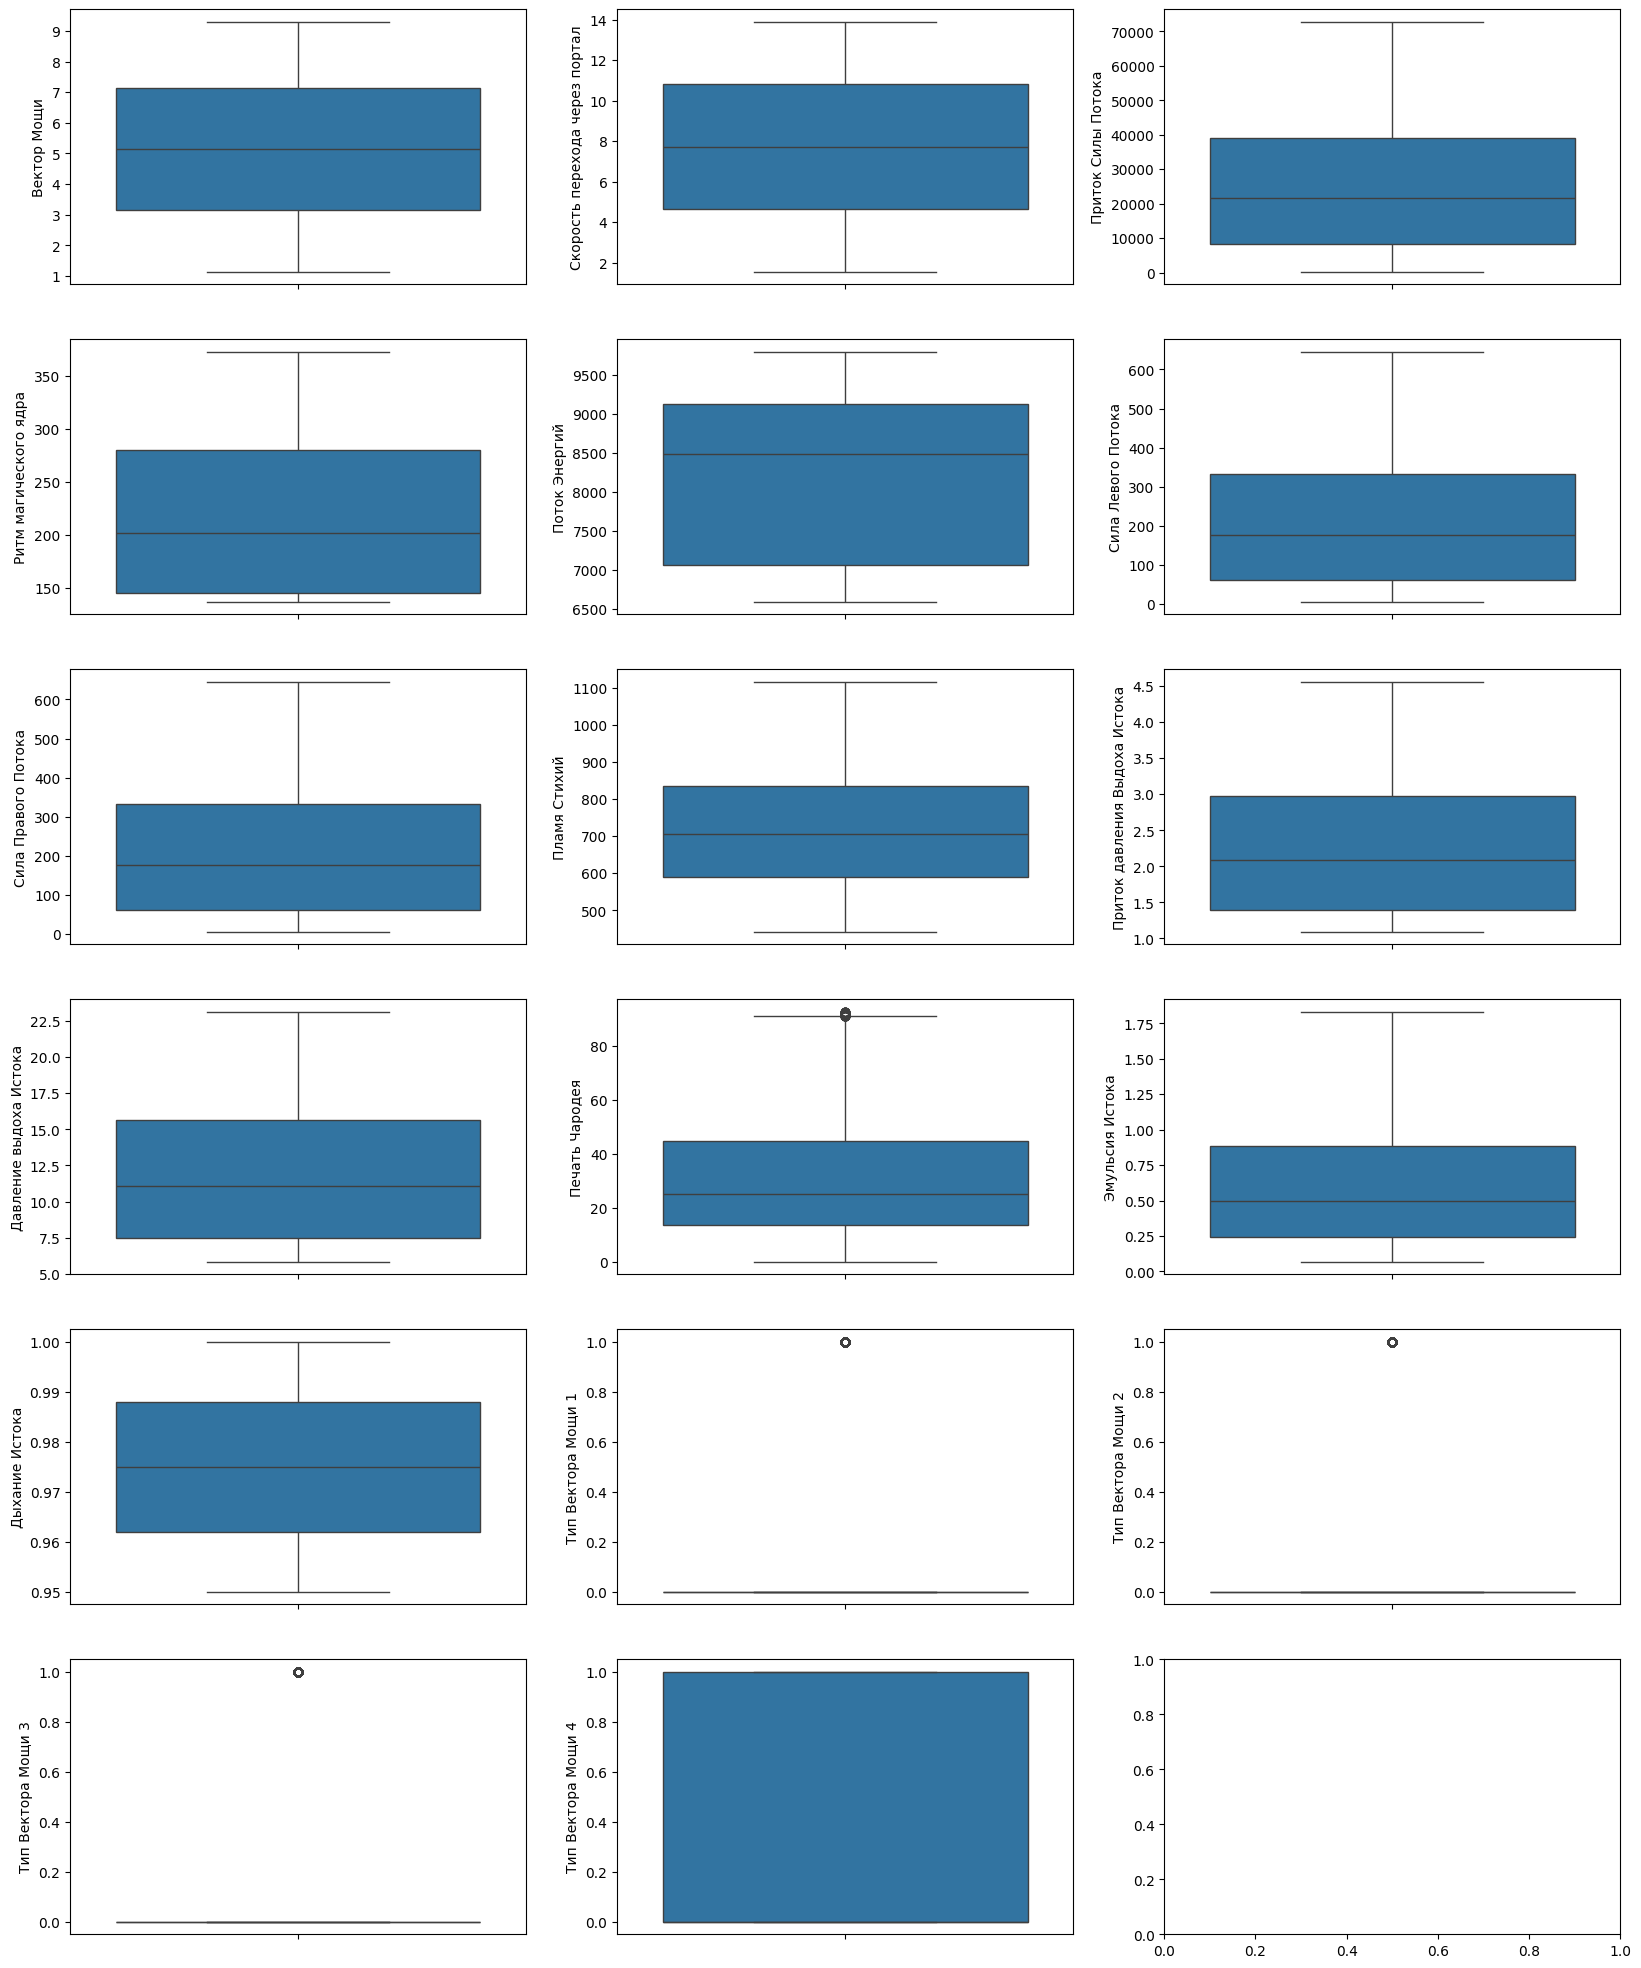

In [ ]:
draw_sns(X_train, sns.boxplot, figsize=(20, 25))

In [ ]:
def calc_bounds(x: t.Iterable[float]) -> t.Tuple[float, float]:
    """Вычисление левой и правой границ IQR

    Args:
        x (t.Iterable[float]): Вариационный ряд

    Returns:
        t.Tuple[float, float]: Левая и правая границы
    """
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [ ]:
def check_feature_outliers_iqr(x: pd.Series) -> np.ndarray[bool]:
    """Проверка выбросов при помощи IQR

    Args:
        x (pd.Series): Вариационный ряд

    Returns:
        np.ndarray[bool]: Массив меток для каждого объекта вариационного ряда, является ли значение выбросом
    """
    lower_bound, upper_bound = calc_bounds(x)
    return ((x < lower_bound) | (x > upper_bound)).values

In [ ]:
#from scipy import stats
def check_feature_outliers_robust_zscore(x: pd.Series, coefficient: float = 2.0) -> np.ndarray[bool]:
    """Проверка выбросов при помощи Robust Z-score

    Args:
        x (pd.Series): Вариационный ряд
        coefficient (float): Коэффициент для определения порога (по умолчанию 3.0)

    Returns:
        np.ndarray[bool]: Массив меток для каждого объекта вариационного ряда, является ли значение выбросом
    """
    median = x.median()
    mad = stats.median_abs_deviation(x, scale='normal')  # MAD с нормальным масштабированием

    # Robust Z-score
    robust_z = np.abs(0.6745 * (x - median) / mad)

    return (robust_z > coefficient).values

In [ ]:
def check_dataset_outliers(df: pd.DataFrame, outliers_method: t.Callable[..., np.ndarray[bool]], **kwargs) -> np.ndarray[bool]:
    """Проверка выбросов у объектов датасета

    Args:
        df (pd.DataFrame): Датасет
        outliers_method (t.Callable[..., np.ndarray[bool]]): Правило детектирования выбросов

    Returns:
        np.ndarray[bool]: Массив меток для каждого объекта датасета, содержит ли объект выбросы
    """
    outliers_flags = [
        outliers_method(df[column], **kwargs) for column in df.columns
    ]
    return np.any(np.array(outliers_flags), axis=0)

In [ ]:
# 1. Находим выбросы методом IQR
outliers_objects_iqr = X_train.loc[check_dataset_outliers(X_train, check_feature_outliers_iqr)]

# 2. Находим выбросы методом Robust Z-score с коэффициентом 2
outliers_objects_z_score_2 = X_train.loc[check_dataset_outliers(X_train, check_feature_outliers_robust_zscore, coefficient=2.0)]

# 3. Находим пересечение методов (IQR и Robust Z-score с коэффициентом 2)
outliers_objects = np.intersect1d(
    outliers_objects_iqr.index,
    outliers_objects_z_score_2.index
)

print(f"Выбросы по IQR: {len(outliers_objects_iqr)} объектов")
print(f"Выбросы по Robust Z-score (коэф. 2): {len(outliers_objects_z_score_2)} объектов")
print(f"Пересечение IQR и Robust Z-score (коэф. 2): {len(outliers_objects)} объектов")

# Выводим общие выбросы
outliers_objects

Выбросы по IQR: 7329 объектов
Выбросы по Robust Z-score (коэф. 2): 10740 объектов
Пересечение IQR и Robust Z-score (коэф. 2): 7329 объектов


array([    2,     3,     6, ..., 10736, 10738, 10739])

In [ ]:
X_train.index.equals(y_train.index)

False

In [ ]:

common_idx = y_train.index.intersection(outliers_objects)

X_train = X_train.drop(index=common_idx)
y_train = y_train.drop(index=common_idx)

In [ ]:
def draw_anomaly(X_2d: np.ndarray[float], anomaly_mask: np.ndarray[bool]) -> None:
    """Визуализация аномальных объектов

    Args:
        X_2d (np.ndarray[float]): Датасет, пониженный до двумерного пространства
        anomaly_mask (np.ndarray[bool]): Маска аномальных объектов
    """
    plt.scatter(X_2d[:, 0], X_2d[:, 1])
    plt.scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], c="red", marker='x')

In [ ]:
def draw_anomaly_pie(anomaly_mask: np.ndarray[bool]) -> None:
    """Визуализация долей аномальных и неаномальных объектов в данных

    Args:
        anomaly_mask (np.ndarray[bool]): Маска аномальных объектов
    """
    _, counts = np.unique(anomaly_mask, return_counts=True)

    plt.pie(counts, labels=counts, autopct='%1.0f%%');
    plt.legend([
        'Нормальные объекты', 'Аномалии'
    ], loc='lower right');

In [ ]:
X_train

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4
0,8.206,12.34656,50990.242,323.302766,9296.166,438.034,438.034,920.600,3.603,18.689,60.450,1.197,0.991,0,0,0,1
1,9.300,13.88988,72774.152,372.846311,9764.211,644.947,644.947,1071.242,4.507,22.486,88.694,1.756,0.975,0,0,0,1
4,7.148,10.80324,38984.099,280.447882,9133.555,332.197,332.197,827.016,2.963,15.439,43.964,0.870,0.965,0,0,0,1
5,9.300,13.88988,72778.465,372.848195,9791.331,644.830,644.830,1095.783,4.476,22.283,90.302,1.788,0.952,0,0,0,1
7,9.300,13.88988,72759.827,372.841179,9742.490,644.997,644.997,1077.528,4.535,22.965,89.842,1.778,0.982,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,8.206,12.34656,50993.285,323.318683,9305.995,438.090,438.090,904.412,3.586,18.305,58.853,1.165,0.987,0,0,0,1
10726,9.300,13.88988,72766.622,372.843902,9749.664,644.815,644.815,1070.458,4.526,22.747,88.989,1.762,0.982,0,0,0,1
10730,7.148,10.80324,38975.400,280.447568,9142.512,332.014,332.014,830.833,2.951,15.313,44.039,0.872,0.952,0,0,0,1
10731,3.144,4.62996,8374.989,145.218445,7040.824,60.306,60.306,578.453,1.392,7.521,12.027,0.238,0.993,0,1,0,0


In [ ]:
X_train.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4
count,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.00000,4114.000000
mean,7.419841,11.138025,46906.445788,298.548407,9085.904437,405.045180,405.045180,884.736096,3.329852,17.111258,55.909325,1.106340,0.975477,0.054934,0.057365,0.05299,0.834711
std,1.998073,3.010525,19820.697865,67.546295,782.632368,181.074269,181.074269,150.275080,0.951510,4.585931,24.195656,0.477828,0.014523,0.227880,0.232567,0.22404,0.371487
min,1.138000,1.543320,441.341000,137.012291,6595.162000,5.318000,5.318000,449.245000,1.102000,5.858000,0.000000,0.069000,0.950000,0.000000,0.000000,0.00000,0.000000
25%,7.148000,10.803240,38985.580250,280.445264,9121.686000,332.188000,332.188000,817.725500,2.966000,15.458000,43.518250,0.862000,0.963000,0.000000,0.000000,0.00000,1.000000
50%,8.206000,12.346560,50992.667000,323.314076,9299.080000,437.963000,437.963000,908.671000,3.570000,18.272000,59.237000,1.173000,0.976000,0.000000,0.000000,0.00000,1.000000
75%,9.300000,13.882974,72755.833250,372.839294,9726.180250,644.705750,644.705750,1044.454000,4.476000,22.221750,86.615500,1.714750,0.988000,0.000000,0.000000,0.00000,1.000000
max,9.300000,13.897048,72784.872000,372.879926,9797.103000,645.236000,645.236000,1115.797000,4.560000,23.140000,92.556000,1.832000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:

X_2d = UMAP().fit_transform(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:

isf = IForest().fit(X_train)
isf_anomaly = isf.predict(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


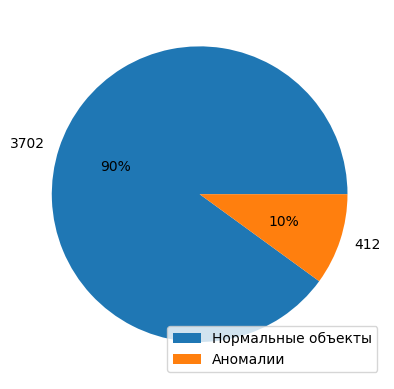

In [ ]:
draw_anomaly_pie(isf_anomaly)

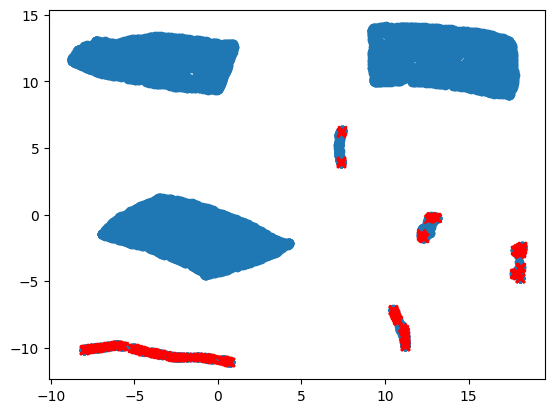

In [ ]:
draw_anomaly(X_2d, isf_anomaly.astype(bool))

In [ ]:

ocsvm = OCSVM().fit(X_train)
ocsvm_anomaly = ocsvm.predict(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


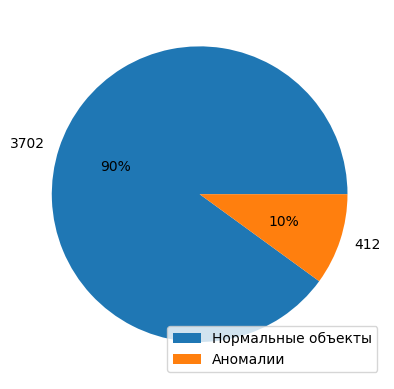

In [ ]:
draw_anomaly_pie(ocsvm_anomaly)

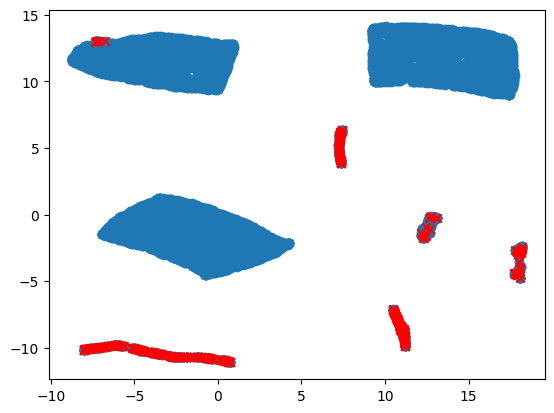

In [ ]:
draw_anomaly(X_2d, ocsvm_anomaly.astype(bool))

In [ ]:
anomalies = np.all(np.array([
    isf_anomaly,
    ocsvm_anomaly,
]), axis=0)

anomaly_index = X_train.loc[anomalies].index

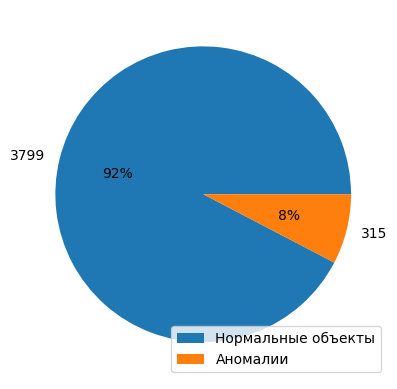

In [ ]:
draw_anomaly_pie(anomalies)

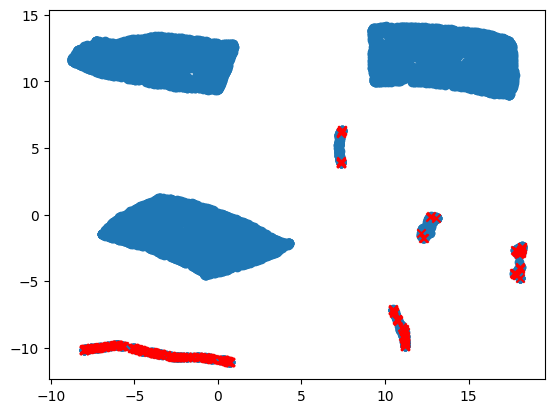

In [ ]:
draw_anomaly(X_2d, anomalies)

После вычисления индексов общих аномальных значений эти строки будут удалены

In [ ]:

common_idx = y_train.index.intersection(anomaly_index)

X_train = X_train.drop(index=common_idx)
y_train = y_train.drop(index=common_idx)

## 1.7. Подведение итогов раздела 1 <a name="data-summary"></a>
<!-- А таких разделах обычно подытоживается вся информация о тех действиях, которые вы делали в разделе -->

В ходе работы было проведено:

анализ данных,

приведение типов к числовому виду,

удаление признаков с большим количеством пропущенных значений,

Заполнение пропусков с помощью IterativeImputer,

Кодирование категориальных признаков,

Удаление выбросов и аномальных значений.

# 2. Генерация новых признаков <a name="data-generate"></a>

## 2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции) <a name="data-heatmap"></a>

<Axes: >

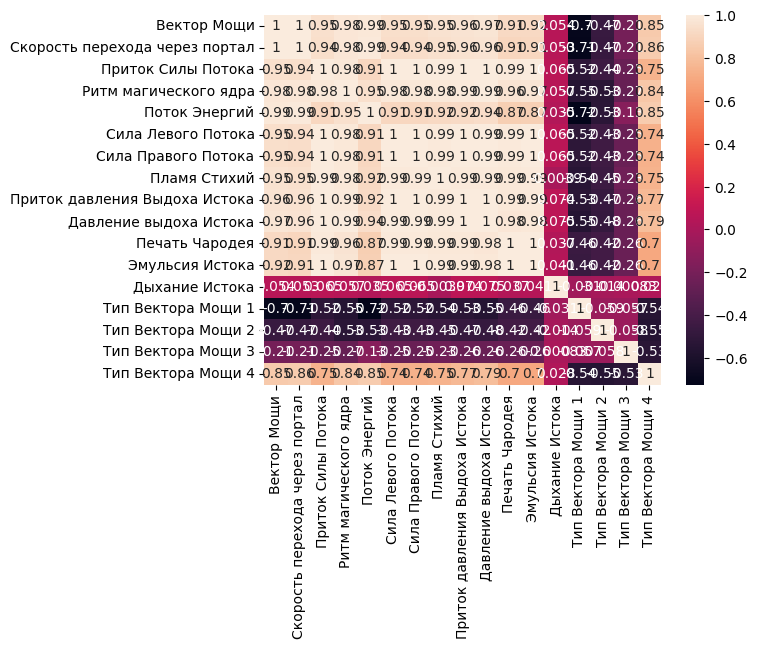

In [ ]:
df_heatmap = X_train
df_heatmap_corr = df_heatmap.corr()
sns.heatmap(df_heatmap_corr, annot=True)

## 2.2. Исправление проблемы мультиколлинеарности в данных <a name="data-multp"></a>

In [ ]:
def create_new_features(df):
    """
    Создание новых признаков на основе физических формул из описания задачи
    """
    # Создаем копию датасета
    df_new = df.copy()

    # 1. Общая мощность потоков
    df_new['Представление о совокупности мощностей'] = (
        df['Сила Левого Потока'] +
        df['Сила Правого Потока'] +
        df['Приток Силы Потока']
    )

    # 2. Общая сила ядра (Ритм × Приток Силы)
    df_new['Общая сила ядра'] = (
        df['Ритм магического ядра'] *
        df['Приток Силы Потока']
    )

    # 3. Общее давление на выходе
    df_new['Общее давление на выходе'] = (
        df['Приток давления Выдоха Истока'] +
        df['Давление выдоха Истока']
    )

    # 4. Магическая производительность (Скорость перехода / Эмульсия)
    df_new['Магическая производительность'] = (
        df['Скорость перехода через портал'] /
        df['Эмульсия Истока']
    ).replace([np.inf, -np.inf], 0)

    # 5. Эффективность ядра (Общая сила ядра / Эмульсия)
    df_new['Эффективность ядра'] = (
        df_new['Общая сила ядра'] /
        df['Эмульсия Истока']
    ).replace([np.inf, -np.inf], 0)

    # 7. Магическая мощность (Эмульсия * Общее давление * разница температур)
    df_new['Магическая мощность'] = (
        df['Эмульсия Истока'] *
        df_new['Общее давление на выходе'] *
        (df['Пламя Стихий'] - 736)
    )

    # Удаляем исходные сильно коррелирующие признаки, заменяя их новыми
    # (Оставляем только по одному из каждой коррелирующей пары)
    columns_to_drop = [
        'Сила Левого Потока',
        'Сила Правого Потока',
        'Приток Силы Потока',
        'Ритм магического ядра',
        'Приток давления Выдоха Истока',
        'Давление выдоха Истока',
        'Дыхание Истока'
    ]

    df_new = df_new.drop(columns=columns_to_drop)

    return df_new

# Создаем датасет с новыми признаками
df_transformed = create_new_features(X_train)
X_train = create_new_features(X_train)
X_test = create_new_features(X_test)

## 2.3. Скалирование данных <a name="data-scaling"></a>

In [ ]:
df_transformed.describe()

,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4,Представление о совокупности мощностей,Общая сила ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность
count,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.00000,4114.000000,4114.000000,4.114000e+03,4114.00000,4114.000000,4.114000e+03,4114.000000
mean,7.419841,11.138025,9085.904437,884.736096,55.909325,1.106340,0.054934,0.057365,0.05299,0.834711,47716.536148,1.532022e+07,20.44111,11.197062,1.259582e+07,5939.484542
std,1.998073,3.010525,782.632368,150.275080,24.195656,0.477828,0.227880,0.232567,0.22404,0.371487,20182.693511,8.312748e+06,5.53658,3.096705,3.274998e+06,6267.073999
min,1.138000,1.543320,6595.162000,449.245000,0.000000,0.069000,0.000000,0.000000,0.00000,0.000000,456.907000,6.258348e+04,6.96000,4.566979,7.924415e+05,-390.768044
25%,7.148000,10.803240,9121.686000,817.725500,43.518250,0.862000,0.000000,0.000000,0.00000,1.000000,39649.989250,1.093343e+07,18.42825,8.048605,1.242472e+07,1305.269413
50%,8.206000,12.346560,9299.080000,908.671000,59.237000,1.173000,0.000000,0.000000,0.00000,1.000000,51868.674500,1.648666e+07,21.84750,10.489856,1.360271e+07,4449.834460
75%,9.300000,13.882974,9726.180250,1044.454000,86.615500,1.714750,0.000000,0.000000,0.00000,1.000000,74045.464500,2.712621e+07,26.69750,12.474873,1.506444e+07,14304.860514
max,9.300000,13.897048,9797.103000,1115.797000,92.556000,1.832000,1.000000,1.000000,1.00000,1.000000,74075.284000,2.714001e+07,27.70000,24.114375,1.592358e+07,19001.277332


In [ ]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 1. Стандартизация (StandardScaler)
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)

X_test_standard = scaler_standard.transform(X_test)
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns)

# 2. MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)

X_test_minmax = scaler_minmax.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)


# 3. RobustScaler
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_train_robust = pd.DataFrame(X_train_robust, columns=X_train.columns)

X_test_robust = scaler_robust.transform(X_test)
X_test_robust = pd.DataFrame(X_test_robust, columns=X_test.columns)

In [ ]:
X_train_standard.describe()


,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4,Представление о совокупности мощностей,Общая сила ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность
count,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03,4.114000e+03
mean,1.364435e-16,7.599388e-17,2.711600e-15,-2.694328e-16,-2.055289e-16,-8.894738e-17,2.417987e-17,-4.317834e-17,1.079458e-16,-1.122637e-17,-3.497445e-16,2.711600e-16,-5.025959e-16,3.013848e-16,-7.599388e-17,3.108840e-17
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00
min,-3.144331e+00,-3.187441e+00,-3.182906e+00,-2.898312e+00,-2.310998e+00,-2.171212e+00,-2.410966e-01,-2.466903e-01,-2.365477e-01,-2.247221e+00,-2.341876e+00,-1.835673e+00,-2.435213e+00,-2.141272e+00,-3.604526e+00,-1.010204e+00
25%,-1.360681e-01,-1.112184e-01,4.572506e-02,-4.459738e-01,-5.121821e-01,-5.114178e-01,-2.410966e-01,-2.466903e-01,-2.365477e-01,4.449942e-01,-3.997250e-01,-5.277823e-01,-3.636008e-01,-1.016835e+00,-5.225136e-02,-7.395442e-01
50%,3.935063e-01,4.014853e-01,2.724159e-01,1.592933e-01,1.375487e-01,1.395231e-01,-2.410966e-01,-2.466903e-01,-2.365477e-01,4.449942e-01,2.057527e-01,1.403364e-01,2.540487e-01,-2.284016e-01,3.074847e-01,-2.377236e-01
75%,9.411003e-01,9.118950e-01,8.182049e-01,1.062966e+00,1.269232e+00,1.273437e+00,-2.410966e-01,-2.466903e-01,-2.365477e-01,4.449942e-01,1.304689e+00,1.420400e+00,1.130147e+00,4.126858e-01,7.538704e-01,1.334976e+00
max,9.411003e-01,9.165704e-01,9.088367e-01,1.537773e+00,1.514781e+00,1.518848e+00,4.147715e+00,4.053665e+00,4.227477e+00,4.449942e-01,1.306166e+00,1.422060e+00,1.311238e+00,4.171815e+00,1.016235e+00,2.084447e+00


In [ ]:
X_train_minmax.describe()

,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4,Представление о совокупности мощностей,Общая сила ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность
count,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.00000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000
mean,0.769645,0.776665,0.777885,0.653349,0.604059,0.588395,0.054934,0.057365,0.05299,0.834711,0.641954,0.563482,0.650005,0.339180,0.780072,0.326436
std,0.244802,0.243694,0.244424,0.225451,0.261416,0.271031,0.227880,0.232567,0.22404,0.371487,0.274153,0.306999,0.266952,0.158420,0.216441,0.323178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.736339,0.749565,0.789060,0.552816,0.470183,0.449801,0.000000,0.000000,0.00000,1.000000,0.532382,0.401473,0.552953,0.178112,0.768764,0.087460
50%,0.865964,0.874492,0.844462,0.689258,0.640013,0.626205,0.000000,0.000000,0.00000,1.000000,0.698355,0.606560,0.717816,0.303001,0.846616,0.249618
75%,1.000000,0.998861,0.977850,0.892967,0.935817,0.933494,0.000000,0.000000,0.00000,1.000000,0.999595,0.999490,0.951663,0.404550,0.943220,0.757817
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_robust.describe()

,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Тип Вектора Мощи 1,Тип Вектора Мощи 2,Тип Вектора Мощи 3,Тип Вектора Мощи 4,Представление о совокупности мощностей,Общая сила ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность
count,4114.000000,4114.000000,4114.000000,4114.000000,4.114000e+03,4114.000000,4114.000000,4114.000000,4114.00000,4114.000000,4.114000e+03,4.114000e+03,4114.000000,4114.000000,4114.000000,4.114000e+03
mean,-0.365316,-0.392415,-0.352651,-0.105566,-7.721317e-02,-0.078171,0.054934,0.057365,0.05299,-0.165289,-1.207176e-01,-7.203453e-02,-0.170075,0.159775,-0.381437,1.145921e-01
std,0.928473,0.977528,1.294690,0.662797,5.614199e-01,0.560338,0.227880,0.232567,0.22404,0.371487,5.867834e-01,5.133614e-01,0.669538,0.699620,1.240658,4.820978e-01
min,-3.284387,-3.507848,-4.473025,-2.026327,-1.374496e+00,-1.294635,0.000000,0.000000,0.00000,-1.000000,-1.494725e+00,-1.014284e+00,-1.800345,-1.338120,-4.852878,-3.723658e-01
25%,-0.491636,-0.501121,-0.293459,-0.401121,-3.647274e-01,-0.364702,0.000000,0.000000,0.00000,0.000000,-3.552411e-01,-3.429446e-01,-0.413490,-0.551537,-0.446255,-2.418972e-01
50%,0.000000,0.000000,0.000000,0.000000,8.243663e-17,0.000000,0.000000,0.000000,0.00000,0.000000,-1.057691e-16,5.751468e-17,0.000000,0.000000,0.000000,3.498585e-17
75%,0.508364,0.498879,0.706541,0.598879,6.352726e-01,0.635298,0.000000,0.000000,0.00000,0.000000,6.447589e-01,6.570554e-01,0.586510,0.448463,0.553745,7.581028e-01
max,0.508364,0.503449,0.823867,0.913542,7.731120e-01,0.772794,1.000000,1.000000,1.00000,0.000000,6.456259e-01,6.579075e-01,0.707743,3.078106,0.879210,1.119377e+00


## 2.4. Подведение итогов раздела 2 <a name="data-summary-2"></a>
<!-- А таких разделах обычно подытоживается вся информация о тех действиях, которые вы делали в разделе -->

В ходе работы было приведено:

Исправление мультиколлинеарности, путём замены признаков на формулы,

Скалирование данных

# 3. Выбор моделей ML и метрик <a name="data-model"></a>

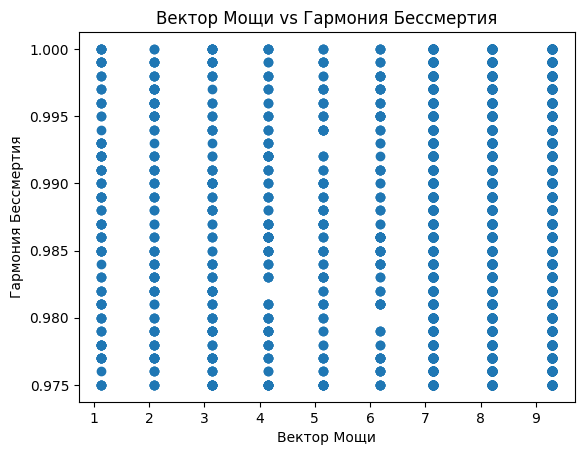

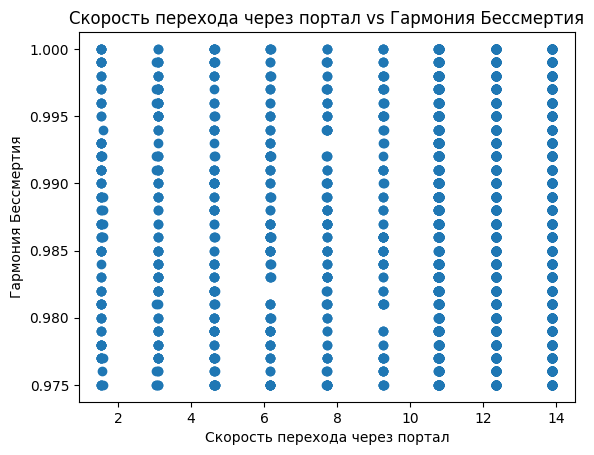

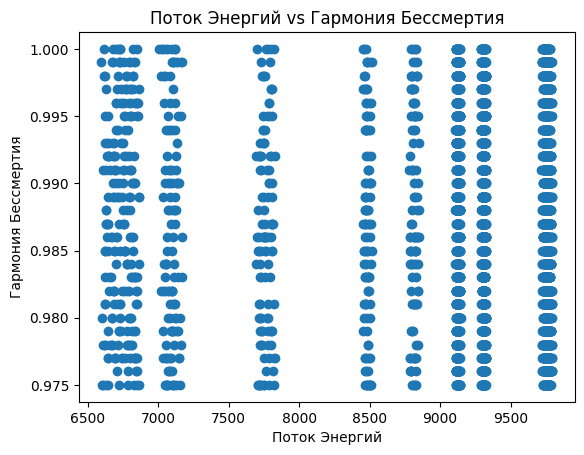

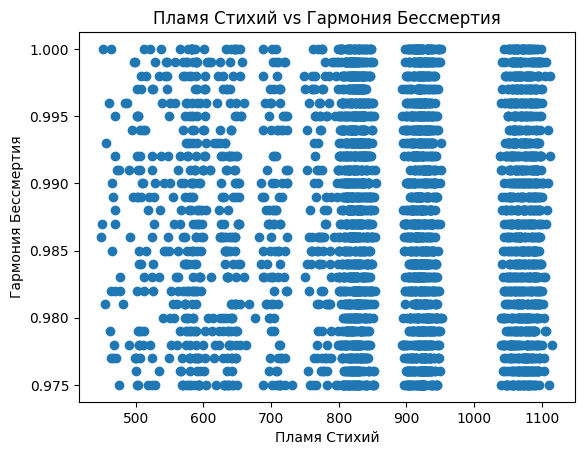

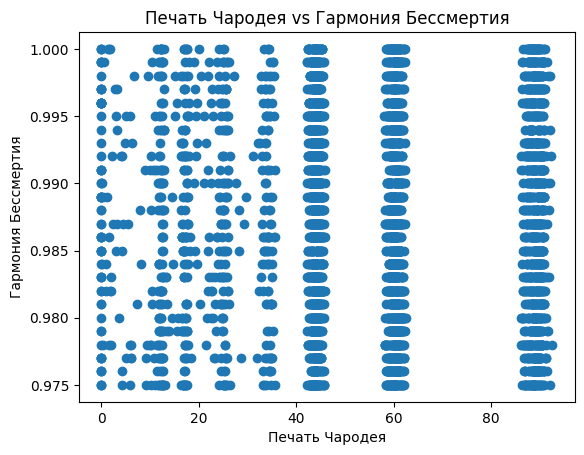

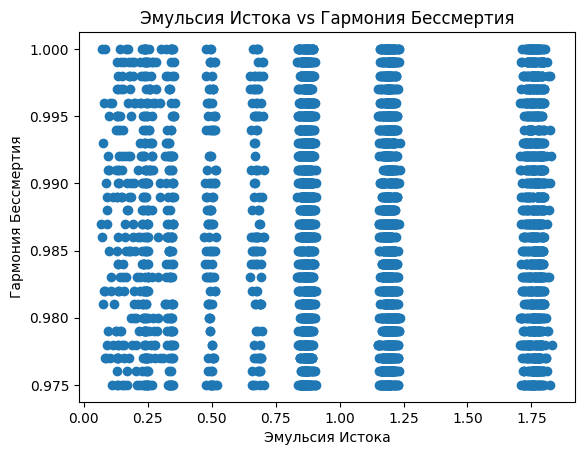

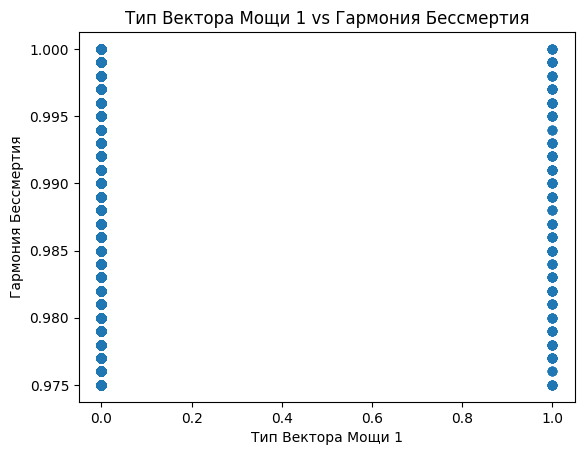

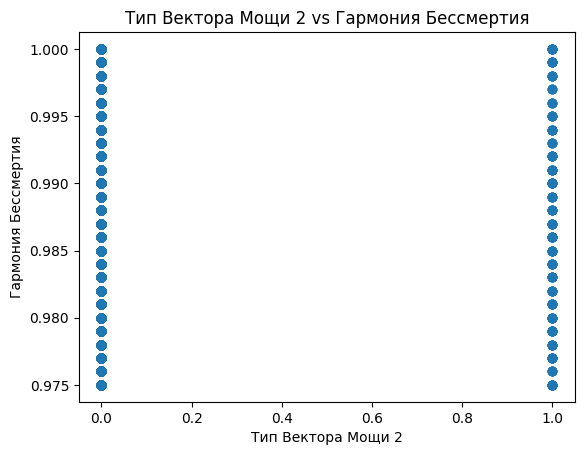

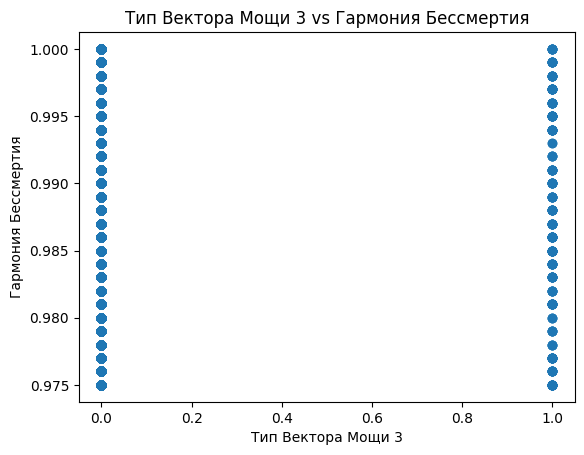

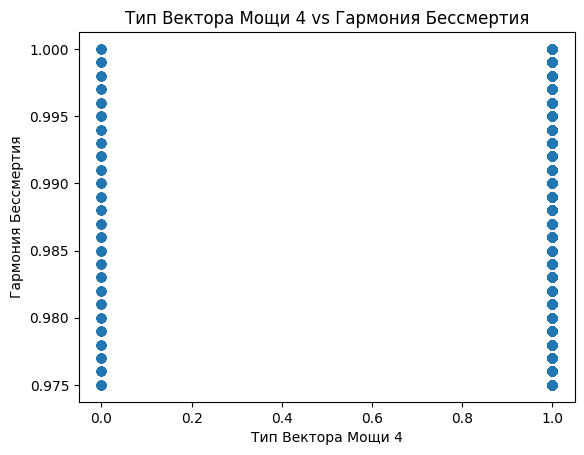

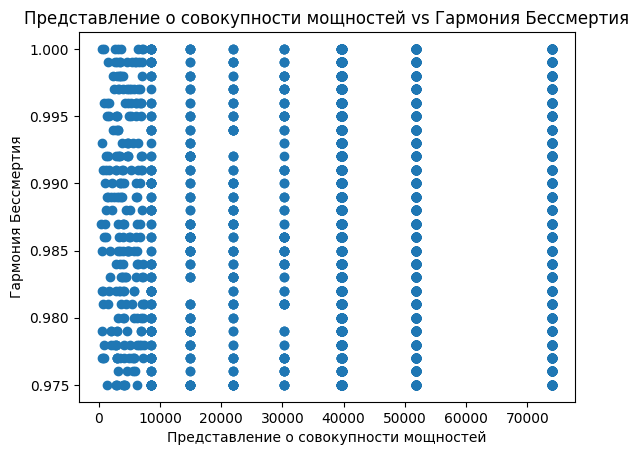

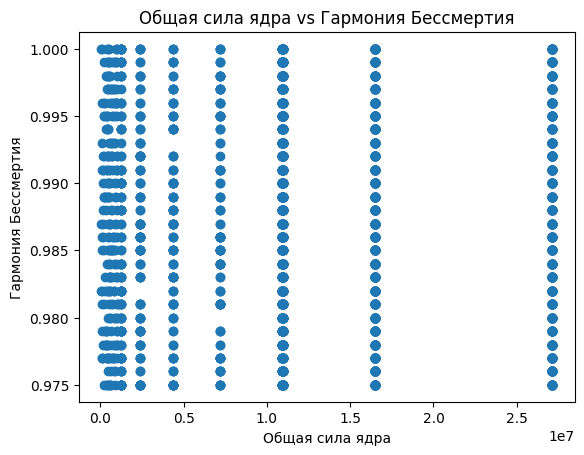

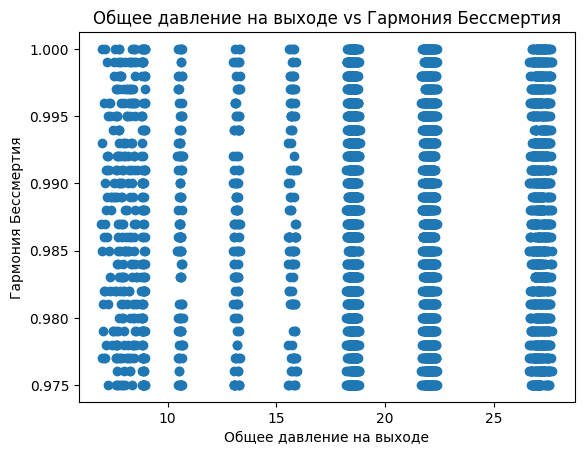

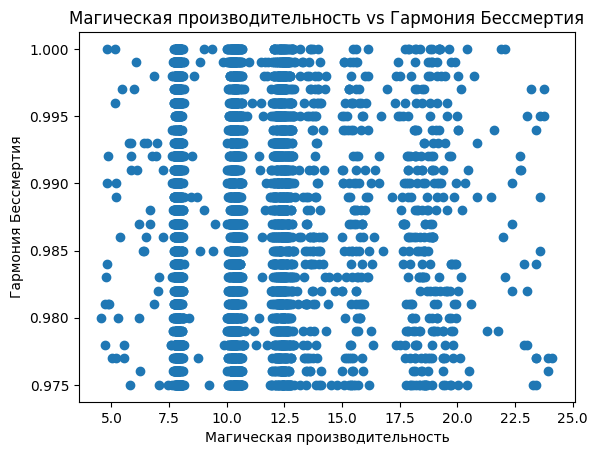

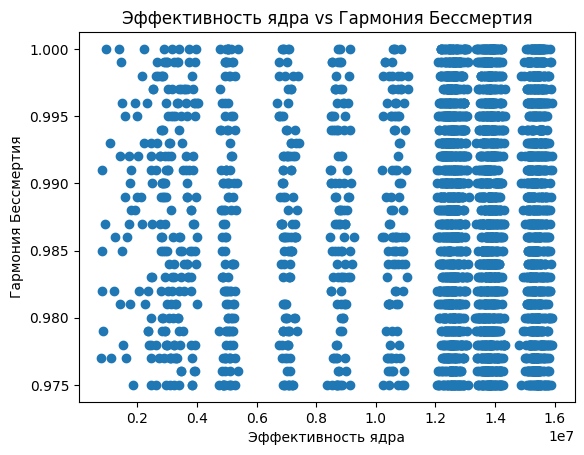

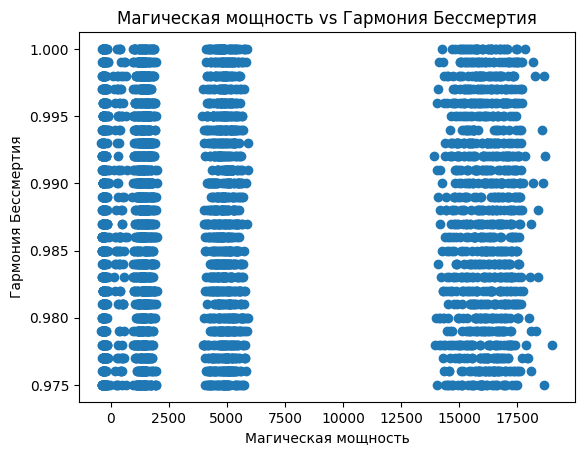

In [ ]:

features = X_train.columns

for feature in features:
    plt.figure()
    plt.scatter(X_train[feature], y_train)
    plt.xlabel(feature)
    plt.ylabel("Гармония Бессмертия")
    plt.title(f"{feature} vs Гармония Бессмертия")
    plt.show()


<Axes: >

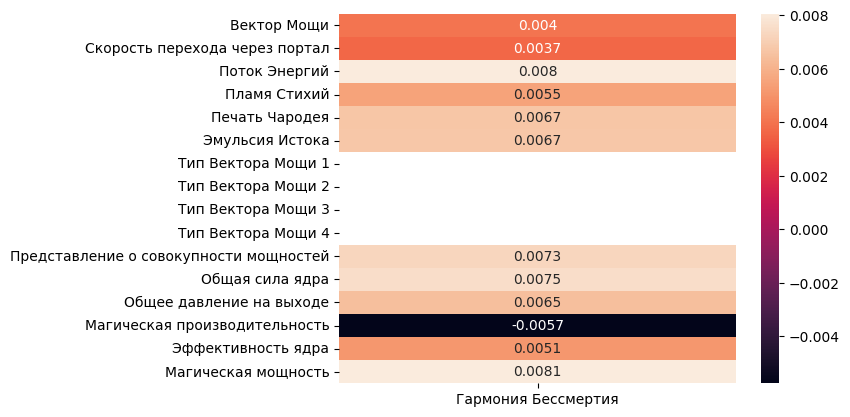

In [ ]:

data = X_train.copy()
data["Гармония Бессмертия"] = y_train

corr_vector = data.corr()["Гармония Бессмертия"].drop("Гармония Бессмертия")


corr_vector_df = corr_vector.to_frame(name="Гармония Бессмертия")

sns.heatmap(corr_vector_df, annot=True)


<!-- Третий раздел самый богатый на писанину. Вам необходимо сначала обосновать выбор моделей, а затем все отобранные модели описать (расписать концептуально, как они работают) -->
Так как перед нами задача регрессии у которой исходя из графиков линейная зависимость, было принято решение воспользоваться моделями линейной регрессии, а именно ElasticNet и Polynomial Regression. Также была выбрана модель SVR, для сравнения результатов с линейными моделями

Модель ElasticNet работает с использованием функции потерь, которая включает штрафы L1 и L2.

L1-регуляризация (Lasso) - уменьшает некоторые коэффициенты регрессии до нуля, что позволяет отбирать признаки.
L2-регуляризация (Ridge) - уменьшает коэффициенты к нулю, но не устанавливает их точно к нулю.

Polynomial Regression работает, моделируя нелинейные зависимости в данных. Это расширение линейной регрессии, где вместо линейного уравнения используется уравнение двух и более степеней.

Принцип работы SVR заключается в нахождении гиперплоскости в многомерном пространстве признаков, которая наилучшим образом соответствует обучающим данным и минимизирует ошибку прогнозирования для задач регрессии



<!-- И снова писанина: необходимо не только описать, какие метрики вы используете, но привести формулы их вычисления -->
Для своей работы я выбрал метрики "MAE","MSE","RMSE","MAPE","R^2"

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$



$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$



$$
MAPE = \frac{1}{n} \sum_{i=1}^{n}
\left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$



$$
R^2 = 1 -
\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
​
$$- y_i - истинное значение целевой переменной  $$
$$- \hat{y}_i - предсказанное значение $$
$$- n - количество наблюдений $$

In [ ]:
# импорт моделей из пула
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import svm

In [ ]:
# формирование сеток гиперпараметров
parameters_Elastic = {
    "alpha": ("float", 1e-2, 10, True),
    "l1_ratio": ("float", 0.0, 1.0, False)
}
parameters_SVR = {
    "C": ("float", 1e-3, 1e2, True),
    "epsilon": ("float", 1e-3, 0.5, False),
    "gamma": ("categorical", ["scale", "auto"])
}

parameters_Forest = {
    "n_estimators": ("int", 10, 200),            # Количество деревьев
    "max_depth": ("int", 3, 20),                 # Максимальная глубина
}

In [ ]:
# импорт метрик из пула
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# 4. Обучение моделей ML и подбор гиперпараметров <a name="data-learning"></a>

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.1 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
# подбор гиперпараметров и обучения лучших моделей
import optuna
def cross(model,X_train,y_train):
  # Инициализация KFold
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
  return scores

def Optun(model, X_train, y_train, X_test, y_test, parameters):

    def objective(trial):

        params = {}

        for param_name, param_info in parameters.items():

            param_type = param_info[0]

            if param_type == "float":
                _, low, high, log = param_info
                params[param_name] = trial.suggest_float(
                    param_name, low, high, log=log
                )

            elif param_type == "int":
                _, low, high = param_info
                params[param_name] = trial.suggest_int(
                    param_name, low, high
                )

            elif param_type == "categorical":
                _, choices = param_info
                params[param_name] = trial.suggest_categorical(
                    param_name, choices
                )

            else:
                raise ValueError(f"Unknown parameter type: {param_type}")

        model_ = model.set_params(**params)

        model_.fit(X_train, y_train)
        y_pred = model_.predict(X_test)

        mse = mean_squared_error(y_test, y_pred) #MSE является гладкой и дифференцируемой функцией, что делает её удобной для оптимизации
        return mse

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=100)

    return study.best_params

model = ElasticNet()
OptunaP = Optun(model,X_train,y_train,X_test,y_test,parameters_Elastic)
OptunaScores = cross(model.set_params(**OptunaP),X_train,y_train)

print(OptunaP,'ElasticNet')
print(OptunaScores,'ElasticNet')

model = svm.SVR()
OptunaP = Optun(model,X_train,y_train,X_test,y_test,parameters_SVR)
OptunaScores = cross(model.set_params(**OptunaP),X_train,y_train)

print(OptunaP,'SVR')
print(OptunaScores,'SVR')

#model = IsolationForest()
#OptunaP = Optun(model,X_train,y_train,X_test,y_test,parameters_Forest)
#OptunaScores = cross(model.set_params(**OptunaP),X_train,y_train)

#print(OptunaP,'IsolationForest')
#print(OptunaScores,'IsolationForest')

model = RandomForestRegressor()
OptunaP = Optun(model, X_train, y_train, X_test, y_test, parameters_Forest)
OptunaScores = cross(model.set_params(**OptunaP), X_train, y_train)

print(OptunaP,'RandomForestRegressor')
print(OptunaScores,'RandomForestRegressor')

Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)
Yhat_pipe = pipe.predict(X_test)



[I 2026-01-08 11:10:30,291] A new study created in memory with name: no-name-b2cb1768-b4f5-404e-8086-ebb635834438
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e-01, tolerance: 2.321e-05
  model = cd_fast.enet_coordinate_descent(
[I 2026-01-08 11:10:30,419] Trial 0 finished with value: 5.614899718198195e-05 and parameters: {'alpha': 0.01113752775667301, 'l1_ratio': 0.6306993090469664}. Best is trial 0 with value: 5.614899718198195e-05.
[I 2026-01-08 11:10:30,445] Trial 1 finished with value: 5.617825341397552e-05 and parameters: {'alpha': 0.04688739623195775, 'l1_ratio': 0.7526586536337653}. Best is trial 0 with value: 5.614899718198195e-05.
[I 2026-01-08 11:10:30,463] Trial 2 finished with value: 5.6178343591685156e-05 and parameters: {'alpha': 0.812161549

{'alpha': 0.020795353507542913, 'l1_ratio': 0.40232517467766377} ElasticNet
[-5.47078920e-05 -5.39735066e-05 -5.60526781e-05 -5.94763902e-05
 -5.86514132e-05] ElasticNet


[I 2026-01-08 11:10:41,473] Trial 5 finished with value: 5.631875984956257e-05 and parameters: {'C': 0.015534657964096688, 'epsilon': 0.0058438357005572246, 'gamma': 'auto'}. Best is trial 0 with value: 5.631700167504198e-05.
[I 2026-01-08 11:10:41,501] Trial 6 finished with value: 5.631700167504198e-05 and parameters: {'C': 22.174003093973546, 'epsilon': 0.44318781865719975, 'gamma': 'auto'}. Best is trial 0 with value: 5.631700167504198e-05.
[I 2026-01-08 11:10:41,520] Trial 7 finished with value: 5.631700167504198e-05 and parameters: {'C': 2.582081164180315, 'epsilon': 0.39922826249985793, 'gamma': 'scale'}. Best is trial 0 with value: 5.631700167504198e-05.
[I 2026-01-08 11:10:41,534] Trial 8 finished with value: 5.631700167504198e-05 and parameters: {'C': 0.24194024690081756, 'epsilon': 0.4873478697250055, 'gamma': 'scale'}. Best is trial 0 with value: 5.631700167504198e-05.
[I 2026-01-08 11:10:41,547] Trial 9 finished with value: 5.631700167504198e-05 and parameters: {'C': 0.6091

{'C': 0.01314346530180026, 'epsilon': 0.43758265379070865, 'gamma': 'auto'} SVR
[-5.47117254e-05 -5.38101458e-05 -5.61114824e-05 -5.89377278e-05
 -5.85200730e-05] SVR


[I 2026-01-08 11:10:54,398] Trial 0 finished with value: 5.7528600683153895e-05 and parameters: {'n_estimators': 93, 'max_depth': 10}. Best is trial 0 with value: 5.7528600683153895e-05.
[I 2026-01-08 11:10:55,506] Trial 1 finished with value: 5.8349507774475705e-05 and parameters: {'n_estimators': 15, 'max_depth': 9}. Best is trial 0 with value: 5.7528600683153895e-05.
[I 2026-01-08 11:11:08,805] Trial 2 finished with value: 5.7819764813730356e-05 and parameters: {'n_estimators': 96, 'max_depth': 14}. Best is trial 0 with value: 5.7528600683153895e-05.
[I 2026-01-08 11:11:14,281] Trial 3 finished with value: 5.666758340058333e-05 and parameters: {'n_estimators': 162, 'max_depth': 4}. Best is trial 3 with value: 5.666758340058333e-05.
[I 2026-01-08 11:11:21,820] Trial 4 finished with value: 6.027924878130504e-05 and parameters: {'n_estimators': 44, 'max_depth': 20}. Best is trial 3 with value: 5.666758340058333e-05.
[I 2026-01-08 11:11:22,766] Trial 5 finished with value: 5.72012327741

{'n_estimators': 71, 'max_depth': 7} RandomForestRegressor
[-5.52076799e-05 -5.48587162e-05 -5.64309903e-05 -6.12303022e-05
 -5.87825208e-05] RandomForestRegressor


# 5. Вычисление метрик на новых данных <a name="data-metrics"></a>

In [ ]:
sets = [('',X_train, X_test), ('standart',X_train_standard, X_test_standard),  ('minmax',X_train_minmax, X_test_minmax), ('robust',X_train_robust, X_test_robust)]

In [ ]:
# ячейки для вычисления метрик на лучших моделях и их сопоставление
from math import sqrt
Headings1=["Регрессор","MAE","MSE","RMSE","MAPE","R^2","MAE","MSE","RMSE","MAPE","R^2"]

table1=[]


classifiers = {
    'ElasticNet': ElasticNet(alpha = 0.06, l1_ratio = 0.0006),
    'SVR': svm.SVR(C = 0.44, epsilon = 0.0015, gamma = 'scale'),
    'RandomForestRegressor': RandomForestRegressor(n_estimators = 10, max_depth=3)
}

for index, (name, classifier) in enumerate(classifiers.items()):
    for scale, X_train, X_test in sets:


      classifier.fit(X_train, np.ravel(y_train))

      y_pred = classifier.predict(X_train)
      a=([round(mean_absolute_error(y_train, y_pred),4),round(mean_squared_error(y_train, y_pred),4),round(sqrt(mean_squared_error(y_train, y_pred)),4),round(sqrt(mean_absolute_percentage_error(y_train, y_pred)),4),round(r2_score(y_train, y_pred),2)])

      y_pred = classifier.predict(X_test)
      b=([round(mean_absolute_error(y_test, y_pred),4),round(mean_squared_error(y_test, y_pred),4),round(sqrt(mean_squared_error(y_test, y_pred)),4),round(sqrt(mean_absolute_percentage_error(y_test, y_pred)),4),round(r2_score(y_test, y_pred),2)])


      y_test_np=np.array(y_test)



      table1.append([name + ' ' +scale]+a+b)

for scale, X_train, X_test in sets:

  y_Polinom_pred = pipe.predict(X_train)
  a=([round(mean_absolute_error(y_train, y_Polinom_pred),4),round(mean_squared_error(y_train, y_Polinom_pred),4),round(sqrt(mean_squared_error(y_train, y_Polinom_pred)),4),round(sqrt(mean_absolute_percentage_error(y_train, y_Polinom_pred)),4),round(r2_score(y_train, y_Polinom_pred),2)])
  y_Polinom_pred = pipe.predict(X_test)
  b=([round(mean_absolute_error(y_test, y_Polinom_pred),4),round(mean_squared_error(y_test, y_Polinom_pred),4),round(sqrt(mean_squared_error(y_test, y_Polinom_pred)),4),round(sqrt(mean_absolute_percentage_error(y_test, y_Polinom_pred)),4),round(r2_score(y_test, y_Polinom_pred),2)])


  table1.append(["Polinomial Regression" +''+ scale]+a+b)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e-01, tolerance: 2.321e-05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
table_Scikit_Custom=pd.DataFrame(table1, columns=Headings1)
table_Scikit_Custom.head(20)

,Регрессор,MAE,MSE,RMSE,MAPE,R^2,MAE,MSE,RMSE,MAPE,R^2
0,ElasticNet,0.0065,1.000000e-04,0.0075,0.0810,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0809,1.000000e-02
1,ElasticNet standart,0.0065,1.000000e-04,0.0075,0.0811,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0812,-0.000000e+00
2,ElasticNet minmax,0.0065,1.000000e-04,0.0075,0.0811,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0811,0.000000e+00
3,ElasticNet robust,0.0065,1.000000e-04,0.0075,0.0811,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0811,0.000000e+00
4,SVR,0.0065,1.000000e-04,0.0075,0.0810,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0812,-0.000000e+00
5,SVR standart,0.0065,1.000000e-04,0.0075,0.0809,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0811,-0.000000e+00
6,SVR minmax,0.0065,1.000000e-04,0.0075,0.0809,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0812,-0.000000e+00
7,SVR robust,0.0065,1.000000e-04,0.0075,0.0809,0.000000e+00,0.0065,1.000000e-04,0.0075,0.0810,0.000000e+00
8,RandomForestRegressor,0.0064,1.000000e-04,0.0075,0.0808,1.000000e-02,0.0066,1.000000e-04,0.0076,0.0815,-1.000000e-02
9,RandomForestRegressor standart,0.0064,1.000000e-04,0.0074,0.0808,2.000000e-02,0.0066,1.000000e-04,0.0076,0.0814,-1.000000e-02


# 6. Результат работы <a name="data-summary-all"></a>


<!-- Тут обычно пишется, какая модель показала себя лучше, с какими метриками и рекомендуется ли ее выводить в прод -->
Исходя из данных, можно сказать, что лучше всего себя показала ElasticNet, тк метрики для тренировочной и тестовой выборки одинаковые и низкие, что говорит о том, что модель не переобучена. И показатель R^2 показывает сравнительно лучший результат. Однако в общем случае, эту модель нельзя использовать, так как показатели всё равно катастрофически плохи и модель не подходит для практического использования.